# This file considers 9 classes,  8 classes  as in spanish paper, 1 classe of ALL patient

In [32]:
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd
import tensorflow as tf


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import LabelEncoder

from tensorflow import keras
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import xml.etree.ElementTree as ET
import sklearn
import itertools
import pickle
import scipy
import os
import csv
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import cm

<AxesSubplot:>

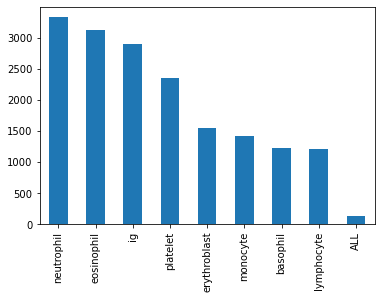

In [33]:
filename = 'C:/Users/laleh/Documents/Pythons/projet_blood/tests_images/data_1_ALL.pkl'
df= pickle.load(open(filename, 'rb'))

df.label.value_counts().plot.bar()


500
3000
5000
7700
9000
10000
16000
17165
14000


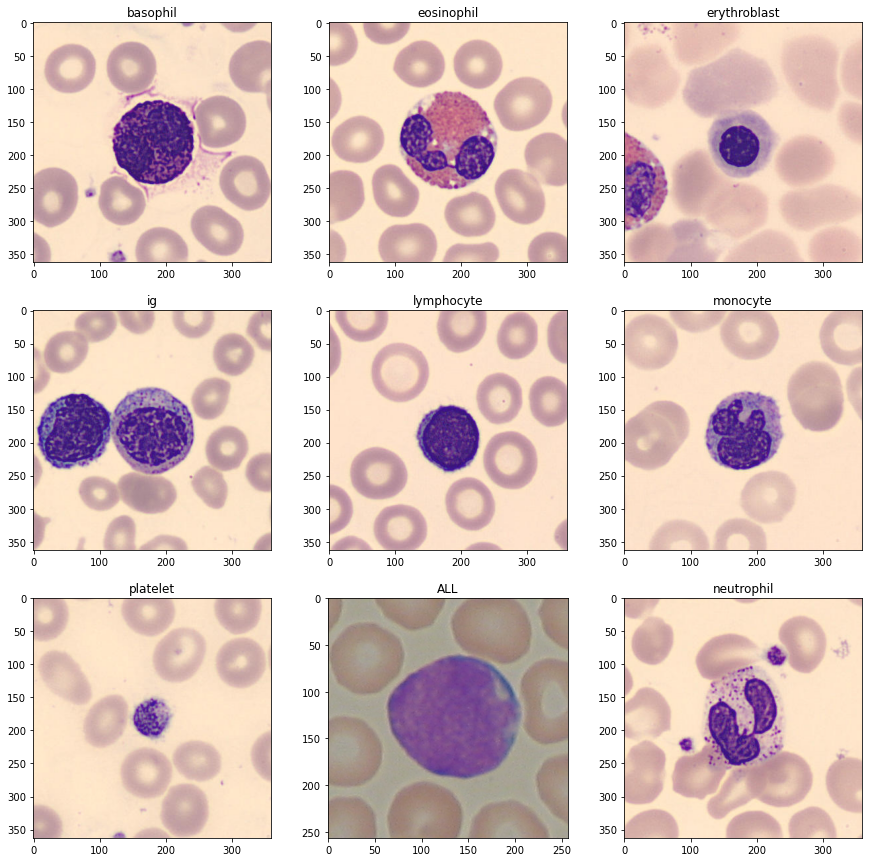

In [49]:


list_vu=[]
plt.figure(figsize=(15,15))

i=1
#while len(list_vu)<10:
    #
#    t = np.random.randint(0,len(df))
for t in   [500,3000,5000,7700,9000,10000,16000,17165,14000] :    
    if df.loc[t,"label"] not in list_vu:
        print(t)
        list_vu.append(df.loc[t,"label"])
        img = plt.imread(df.loc[t,"path"])
        plt.subplot(3,3,i)
        plt.imshow(img)
        i=len(list_vu)+1
        plt.title(df.loc[t,"label"])
        
        
  


In [3]:
data_train, data_test = train_test_split(df, test_size=0.2, random_state=123)

In [4]:


train_data_generator=ImageDataGenerator(
preprocessing_function=preprocess_input,
    rotation_range=10,
 width_shift_range=0.1,
height_shift_range=0.1,
zoom_range=1.1,
horizontal_flip=True)

test_data_generator=ImageDataGenerator(preprocessing_function=preprocess_input)

batch_size = 32

data_train['out']=data_train.label.replace(["neutrophil","eosinophil","ig","platelet","erythroblast",
                            "monocyte","basophil","lymphocyte","ALL"],[0,1,2,3,4,5,6,7,8])
data_train['out']=data_train['out'].astype(str)
train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "path",
                                                           y_col='out',
                                                           class_mode ="sparse",
                                                          target_size = (224 , 224), 
                                                          batch_size = batch_size)
data_test['out']=data_test.label.replace(["neutrophil","eosinophil","ig","platelet","erythroblast",
                            "monocyte","basophil","lymphocyte","ALL"],[0,1,2,3,4,5,6,7,8])
data_test['out']=data_test['out'].astype(str)
test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory="",
                                                           x_col = "path",
                                                           y_col='out',
                                                           class_mode ="sparse",
                                                          target_size = (224 , 224), 
                                                          batch_size = batch_size)

<ipython-input-4-ed0385609eb6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['out']=data_train.label.replace(["neutrophil","eosinophil","ig","platelet","erythroblast",
<ipython-input-4-ed0385609eb6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['out']=data_train['out'].astype(str)


Found 13777 validated image filenames belonging to 9 classes.
Found 3445 validated image filenames belonging to 9 classes.


<ipython-input-4-ed0385609eb6>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['out']=data_test.label.replace(["neutrophil","eosinophil","ig","platelet","erythroblast",
<ipython-input-4-ed0385609eb6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['out']=data_test['out'].astype(str)


In [5]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import backend as K





from tensorflow.keras.applications.vgg16 import VGG16

n_class=9



base_model=VGG16(weights='imagenet', include_top=False)
for layer in base_model.layers:
    layer.trainable=False
    
    
    
model=Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(n_class, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [6]:
history = model.fit_generator(generator=train_generator, 
                                epochs = 1,
                                steps_per_epoch = len(data_train)//batch_size,
                                validation_data = test_generator,
                                validation_steps = len(data_test)//batch_size
                                )

C:\Users\laleh\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


430/430 [==============================] - 210s 456ms/step - loss: 1.6381 - acc: 0.4150 - val_loss: 1.2692 - val_acc: 0.4690


In [7]:
for layer in base_model.layers[-4:]:
    layer.trainable = True


In [8]:
model.compile(optimizer=Adam(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(generator=train_generator, 
                                epochs = 10,
                                steps_per_epoch = len(data_train)//batch_size,
                                validation_data=test_generator,
                                validation_steps=len(data_test)//batch_size
                                )

C:\Users\laleh\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
430/430 [==============================] - 148s 341ms/step - loss: 0.7592 - accuracy: 0.7337 - val_loss: 0.2450 - val_accuracy: 0.9159
Epoch 2/10
430/430 [==============================] - 146s 338ms/step - loss: 0.4839 - accuracy: 0.8290 - val_loss: 0.2308 - val_accuracy: 0.9270
Epoch 3/10
430/430 [==============================] - 144s 335ms/step - loss: 0.4236 - accuracy: 0.8503 - val_loss: 0.1519 - val_accuracy: 0.9541
Epoch 4/10
430/430 [==============================] - 144s 336ms/step - loss: 0.3664 - accuracy: 0.8738 - val_loss: 0.1352 - val_accuracy: 0.9579
Epoch 5/10
430/430 [==============================] - 150s 348ms/step - loss: 0.3267 - accuracy: 0.8878 - val_loss: 0.2221 - val_accuracy: 0.9357
Epoch 6/10
430/430 [==============================] - 145s 338ms/step - loss: 0.3234 - accuracy: 0.8887 - val_loss: 0.2614 - val_accuracy: 0.9264
Epoch 7/10
430/430 [==============================] - 146s 338ms/step - loss: 0.2906 - accuracy: 0.9003 - val_loss: 0.1205 -

In [9]:
from PIL import Image

def convert_image(X):
    X_img=[]
    for image in X:
        
        
             with Image.open(image) as im:

    
                    img = im.resize((224, 224))
                 
                    
                    a = np.asarray(img)
                    X_img.append(a) 
                    
                    
    return np.array(X_img)

# Load the images train
X_train_img= convert_image(data_train.path)
Y_train = data_train['out']

# Load the images test
X_test_img = convert_image(data_test.path)
Y_test = data_test['out']


In [10]:
X_train_img.shape

(13777, 224, 224, 3)

In [11]:
predictions = model.predict(x=X_test_img, batch_size=32)

from sklearn.metrics import classification_report
Y_test.shape
print(classification_report(Y_test.values.astype(int),
predictions.argmax(axis=1), target_names=["neutrophil","eosinophil","ig","platelet","erythroblast",
                            "monocyte","basophil","lymphocyte","ALL"]))

              precision    recall  f1-score   support

  neutrophil       0.99      0.42      0.59       657
  eosinophil       0.24      1.00      0.39       630
          ig       1.00      0.02      0.04       609
    platelet       0.83      0.81      0.82       452
erythroblast       0.97      0.24      0.38       314
    monocyte       0.00      0.00      0.00       279
    basophil       0.82      0.08      0.14       229
  lymphocyte       0.00      0.00      0.00       253
         ALL       0.00      0.00      0.00        22

    accuracy                           0.40      3445
   macro avg       0.54      0.28      0.26      3445
weighted avg       0.66      0.40      0.34      3445



C:\Users\laleh\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laleh\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laleh\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 4

# dernière étape de modélisation, partie SVM

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
intermediate_layer_model = Model( inputs=model.input, outputs=model.layers[2].output)
X_train_features = intermediate_layer_model.predict(preprocess_input(X_train_img))
X_test_features = intermediate_layer_model.predict(preprocess_input(X_test_img))
params = {'C':np.linspace(0.1, 1000, 10) }
svm = SVC(C=100)

grid = GridSearchCV(estimator=svm, param_grid=params, cv=3)
grid = grid.fit(X_train_features,  data_train["out"])
print(grid.best_params_)
print(grid.score(X_test_features,data_test["out"]))

{'C': 111.19999999999999}
0.9759071117561684


In [16]:
print(X_train_features.shape, X_test_img.shape,
X_train_img.shape)

(13777, 1024) (3445, 224, 224, 3) (13777, 224, 224, 3)


In [23]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
intermediate_layer_model = Model( inputs=model.input, outputs=model.layers[2].output)
X_train_features = intermediate_layer_model.predict(preprocess_input(X_train_img))
X_test_features = intermediate_layer_model.predict(preprocess_input(X_test_img))
svm = SVC(C=111)
svm = svm.fit(X_train_features,  data_train["out"])
"""

In [14]:
predictions_svm = grid.predict(X_test_features)


print(classification_report(Y_test.values.astype(int),
predictions_svm.astype(int), target_names=["neutrophil","eosinophil","ig","platelet","erythroblast",
                            "monocyte","basophil","lymphocyte","ALL"]))

              precision    recall  f1-score   support

  neutrophil       0.97      0.98      0.97       657
  eosinophil       1.00      1.00      1.00       630
          ig       0.96      0.95      0.95       609
    platelet       1.00      1.00      1.00       452
erythroblast       0.98      0.98      0.98       314
    monocyte       0.96      0.94      0.95       279
    basophil       0.96      0.99      0.97       229
  lymphocyte       0.95      0.97      0.96       253
         ALL       1.00      1.00      1.00        22

    accuracy                           0.98      3445
   macro avg       0.98      0.98      0.98      3445
weighted avg       0.98      0.98      0.98      3445



In [15]:
filename = 'svm_Models2_test9_classes.pkl'
pickle.dump(svm, open(filename, 'wb'))
#svm= pickle.load(open(filename, 'rb'))